In [36]:
%matplotlib inline
import glob
import os
import matplotlib.pyplot as plt

import artm

print (artm.version())

0.9.2


In [37]:
batch_vectorizer = None
if len(glob.glob(os.path.join("batch_3_years", "*.batch"))) < 1:
    batch_vectorizer = artm.BatchVectorizer(data_path="../bigARTM_files/3years/", data_format="bow_uci", collection_name="issues", target_folder="batch_3_years")
else:
    batch_vectorizer = artm.BatchVectorizer(data_path="batch_3_years", data_format="batches")

In [23]:
dictionary = artm.Dictionary()

model_artm = artm.ARTM(topic_names=["topic_{}".format(i) for i in range(150)],
                       show_progress_bars=True,
                       scores=[artm.PerplexityScore(name="PerplexityScore",
                                                    dictionary=dictionary)],
                       regularizers=[artm.SmoothSparseThetaRegularizer(name="SparseTheta", tau=-0.15)],
                       cache_theta=True)
# tau < 0 - sparse, > 0 - smooth

In [24]:
if not os.path.isfile("batch_3_years/dictionary.dict"):
    dictionary.gather(data_path=batch_vectorizer.data_path)
    dictionary.save(dictionary_path="batch_3_years/dictionary.dict")

dictionary.load(dictionary_path="batch_3_years/dictionary.dict")

In [25]:
model_artm.initialize(dictionary=dictionary)

In [26]:
model_artm.scores.add(artm.SparsityPhiScore(name="SparsityPhiScore"))
model_artm.scores.add(artm.SparsityThetaScore(name="SparsityThetaScore"))
model_artm.scores.add(artm.TopicKernelScore(name="TopicKernelScore", probability_mass_threshold=0.3))
model_artm.scores.add(artm.TopTokensScore(name="TopTokensScore", num_tokens=5))

In [27]:
model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name="SparsePhi", tau=-0.1))
model_artm.regularizers.add(artm.DecorrelatorPhiRegularizer(name="DecorrelatorPhi", tau=1.5e+4))

In [28]:
model_artm.num_document_passes = 1

model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=25)

In [29]:
for topic_name in model_artm.topic_names:
    print (topic_name, ':', model_artm.score_tracker["TopTokensScore"].last_tokens[topic_name])

topic_0 : ['value', 'key', 'duplicate', 'entry', 'insert']
topic_1 : ['une', 'pdf', 'il', 'liste', 'quand']
topic_2 : ['memory', 'operation', 'buff', 'bound', 'restriction']
topic_3 : ['url', 'json', 'token', 'member', 'stream']
topic_4 : ['config', 'variable', 'global', 'directly', 'prompt']
topic_5 : ['cluster', 'cache', 'manage', 'clear', 'monitor']
topic_6 : ['service', 'azure', 'portal', 'optional', 'score']
topic_7 : ['et', 'information', 'place', 'contact', 'modifier']
topic_8 : ['check', 'device', 'alert', 'generic', 'cpu']
topic_9 : ['ui', 'bar', 'scroll', 'hide', 'tree']
topic_10 : ['на', 'не', 'software', 'research', 'то']
topic_11 : ['index', 'array', 'route', 'vue', 'final']
topic_12 : ['require', 'execute', 'mechanism', 'specification', 'arbitrary']
topic_13 : ['post', 'fee', 'office', 'unavailable', 'afl']
topic_14 : ['git', 'integration', 'commit', 'management', 'pack']
topic_15 : ['provider', 'scan', 'stock', 'primary', 'contract']
topic_16 : ['sign', 'verify', 'dos', 

topic_138 : ['language', 'theme', 'translation', 'automatic', 'suite']
topic_139 : ['operator', 'statement', 'history', 'keyword', 'nombre']
topic_140 : ['db', 'automatically', 'flag', 'patch', 'license']
topic_141 : ['send', 'handle', 'connector', 'parent', 'widget']
topic_142 : ['etc', 'deployment', 'pipeline', 'drag', 'bin']
topic_143 : ['load', 'dependency', 'thread', 'migrate', 'assembly']
topic_144 : ['state', 'package', 'configuration', 'metadata', 'pattern']
topic_145 : ['button', 'save', 'close', 'card', 'turn']
topic_146 : ['item', 'column', 'list', 'record', 'mobile']
topic_147 : ['upgrade', 'loop', 'stick', 'das', 'notify']
topic_148 : ['space', 'car', 'background', 'reader', 'water']
topic_149 : ['fix', 'tool', 'dev', 'add', 'quick']


Sparsity Phi: 0.993 (ARTM)
Sparsity Theta: 0.947 (ARTM)
Perplexity: 184.772 (ARTM)


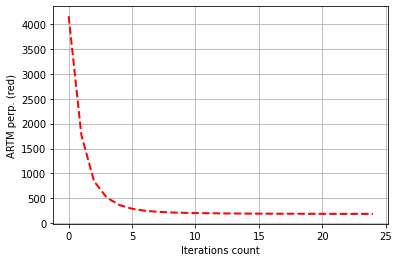

In [30]:
def print_scores(model_artm):
    print ("Sparsity Phi: {0:.3f} (ARTM)".format(
        model_artm.score_tracker['SparsityPhiScore'].last_value))
    
    print ("Sparsity Theta: {0:.3f} (ARTM)".format(
        model_artm.score_tracker['SparsityThetaScore'].last_value))

    print ("Perplexity: {0:.3f} (ARTM)".format(
        model_artm.score_tracker['PerplexityScore'].last_value))

    plt.plot(range(model_artm.num_phi_updates), model_artm.score_tracker["PerplexityScore"].value, "r--", linewidth=2)
    plt.xlabel("Iterations count")
    plt.ylabel("ARTM perp. (red)")
    plt.grid(True)
    plt.show()
    
print_scores(model_artm)

In [31]:
phi_matrix = model_artm.get_phi()

In [32]:
print(phi_matrix)

               topic_0  topic_1  topic_2  topic_3  topic_4  topic_5  topic_6  \
datatech           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
temasek            0.0      0.0      0.0      0.0      0.0      0.0      0.0   
científicos        0.0      0.0      0.0      0.0      0.0      0.0      0.0   
emprendedores      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
definitional       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...                ...      ...      ...      ...      ...      ...      ...   
xdp                0.0      0.0      0.0      0.0      0.0      0.0      0.0   
torture            0.0      0.0      0.0      0.0      0.0      0.0      0.0   
políticas          0.0      0.0      0.0      0.0      0.0      0.0      0.0   
обычный            0.0      0.0      0.0      0.0      0.0      0.0      0.0   
borked             0.0      0.0      0.0      0.0      0.0      0.0      0.0   

               topic_7  topic_8  topic_

In [33]:
theta_matrix = model_artm.get_theta()

In [34]:
print(theta_matrix)

           354848863  354849081  354855846  354849210  354853389  354531001  \
topic_0          0.0        0.0        0.0   0.000000        0.0        0.0   
topic_1          0.0        0.0        0.0   0.000000        0.0        0.0   
topic_2          0.0        0.0        0.0   0.000000        0.0        0.0   
topic_3          0.0        0.0        0.0   0.000000        0.0        0.0   
topic_4          0.0        0.0        0.0   0.000000        0.0        0.0   
...              ...        ...        ...        ...        ...        ...   
topic_145        0.0        0.0        0.0   0.000000        0.0        0.0   
topic_146        0.0        0.0        0.0   0.000000        0.0        0.0   
topic_147        0.0        0.0        0.0   0.177445        0.0        0.0   
topic_148        0.0        0.0        0.0   0.000000        0.0        0.0   
topic_149        0.0        0.0        0.0   0.000000        0.0        0.0   

           354849772  354849803  316370907  3548542

In [38]:
model_artm.dump_artm_model("./3years_bigartm_dump")